# Data Prepocessing

In [118]:
# Importing librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [119]:
#Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')

In [120]:
# Selection of the independante variable vector (the features)
x = dataset.iloc[:,1:2].values
# Selection of the dependante variable vector
y = dataset.iloc[:, 2].values

# Splitting the data into the training set and test set

In [121]:
# We don't have more information to separate the data into the training and test set
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size =0.2, random_state = 0)
#print(x_train.shape, y_train.shape)
#print(x_test.shape, y_test.shape)"""

# Feature scaling

In [122]:
# import the standscaler librairie
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(x)

/home/ouedraogo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ouedraogo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Fitting SVR  to the dataset

In [123]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

/home/ouedraogo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

# Predicting a new result

In [124]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))
y_pred

array([0.29047426])

# Visualising SVR results

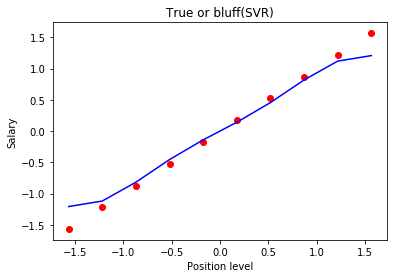

In [125]:
plt.scatter(x,y, color ='red')
plt.plot(x, regressor.predict(x), color = 'blue' )
plt.title('True or bluff(SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising SVR for higher resolution and smoother curve

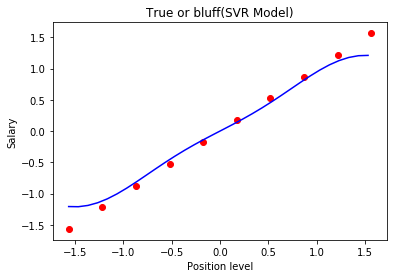

In [126]:
x_grid = np.arange(min(x),max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color ='red')
plt.plot(x_grid,regressor.predict(x_grid), color = 'blue' )
plt.title('True or bluff(SVR Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()